In [1]:
from knns.hnsw import HNSW_Graph
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from data import generate_embeddings

db_embeddings = generate_embeddings(1000, size=2)

In [4]:
db_name = 'sift1m2d'
db_embeddings = np.load(f"../data/tfds_db_{db_name}.npy")

In [5]:
from knns.hnsw import HNSW

hnsw = HNSW()
hnsw.insert(db_embeddings)

0: 0.0s
100: 0.022997140884399414s
200: 0.040999650955200195s
300: 0.04100298881530762s
400: 0.05399799346923828s
500: 0.0689992904663086s
600: 0.0670006275177002s
700: 0.06699919700622559s
800: 0.07200288772583008s
900: 0.0729970932006836s
1000: 0.07300162315368652s
1100: 0.07000041007995605s
1200: 0.072998046875s
1300: 0.07299971580505371s
1400: 0.07100129127502441s
1500: 0.07299923896789551s
1600: 0.07500123977661133s
1700: 0.07399868965148926s
1800: 0.07600092887878418s
1900: 0.07600021362304688s
2000: 0.07699847221374512s
2100: 0.07300066947937012s
2200: 0.07599973678588867s
2300: 0.07800173759460449s
2400: 0.08099842071533203s
2500: 0.07799935340881348s
2600: 0.07900094985961914s
2700: 0.082000732421875s
2800: 0.08099865913391113s
2900: 0.07900118827819824s
3000: 0.07900238037109375s
3100: 0.07799601554870605s
3200: 0.08300161361694336s
3300: 0.09199929237365723s
3400: 0.07700085639953613s
3500: 0.0820002555847168s
3600: 0.07899975776672363s
3700: 0.08099842071533203s
3800: 0.077

In [6]:
import pickle

with open(f'../data/hnsw_{db_name}.pkl', 'wb') as file:
    pickle.dump(hnsw, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle

with open(f'../data/hnsw_{db_name}.pkl', 'rb') as file:
    hnsw = pickle.load(file)

In [43]:
def plot_levels(g:HNSW_Graph, only_layer=None):
    all_values = [abs(node.embedding[0]) for node in g.nodes] + [abs(node.embedding[1]) for node in g.nodes]
    limit = max(all_values)
    limit += limit/10
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)

    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    for layer in range(g.height):
        if only_layer==None or layer==only_layer:
            x = []
            y = []
            for node in g.nodes:
                if node.get_height() > layer:
                    x.append(node.embedding[0])
                    y.append(node.embedding[1])
            plt.scatter(x, y, label=layer)

    if only_layer != None:
        plt.title(f"layer size = {len(x)}")
    plt.legend()
    plt.show()
        

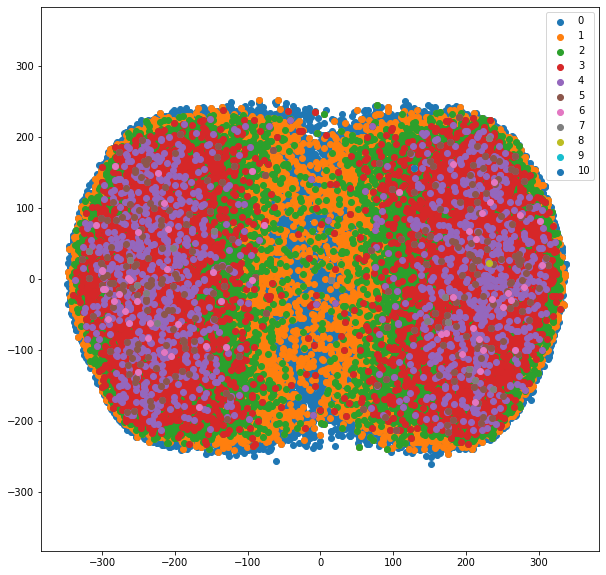

In [44]:
plot_levels(hnsw.graph)

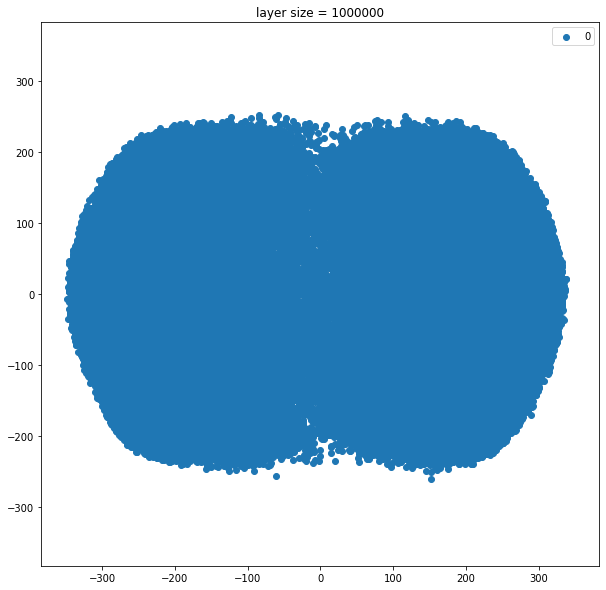

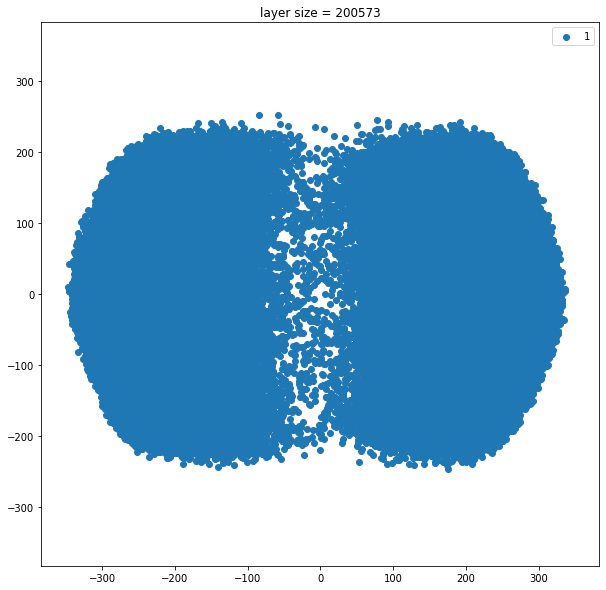

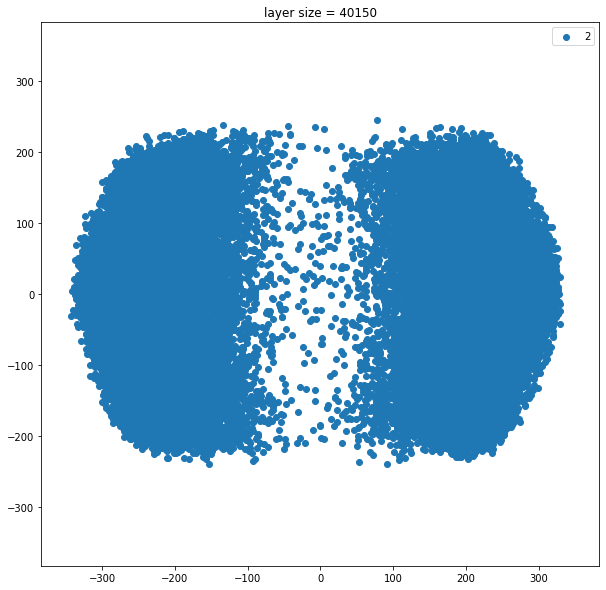

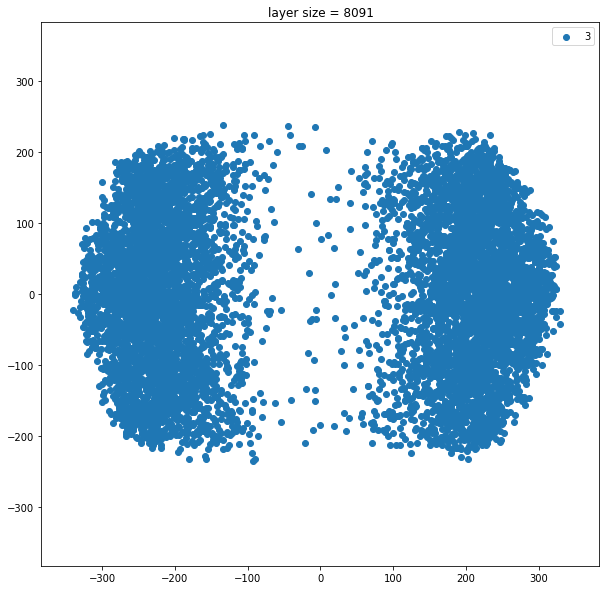

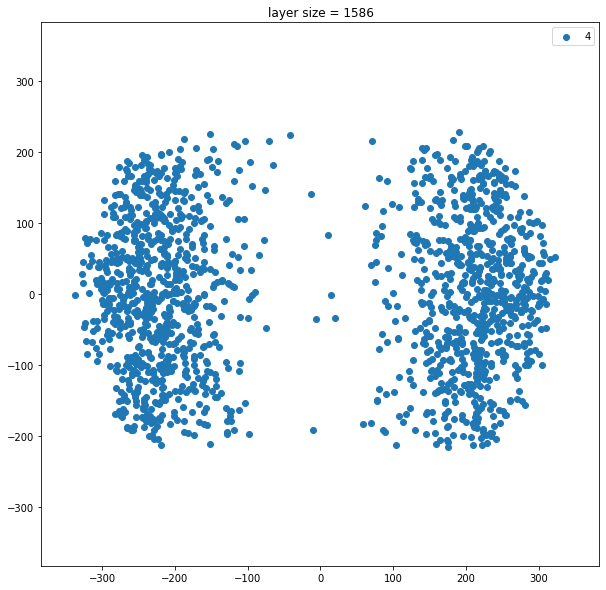

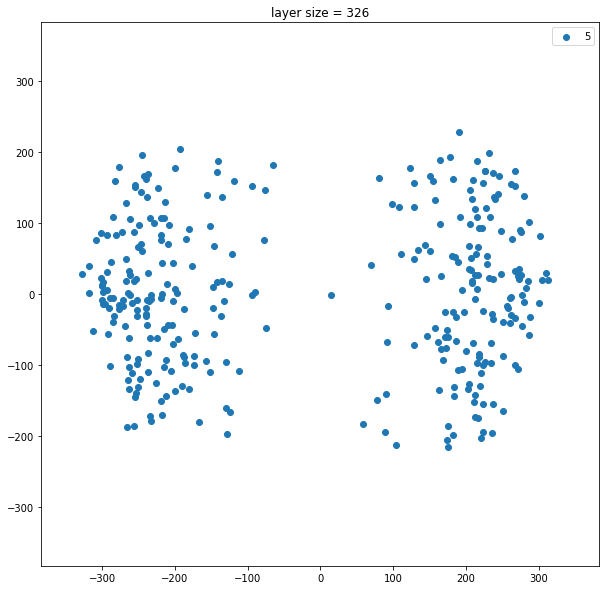

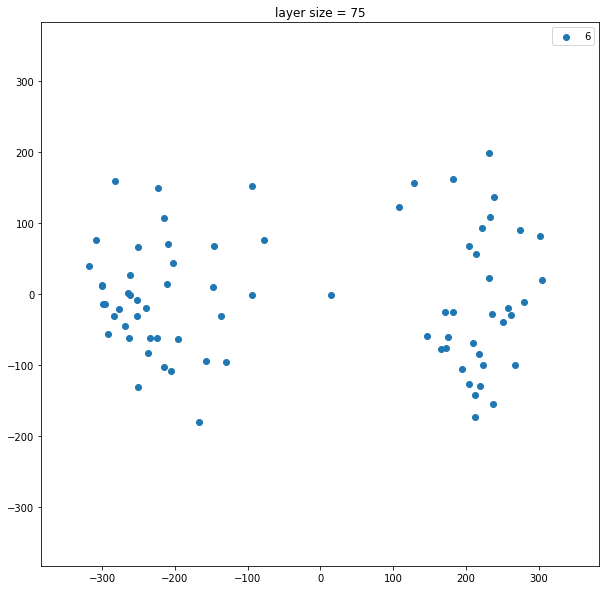

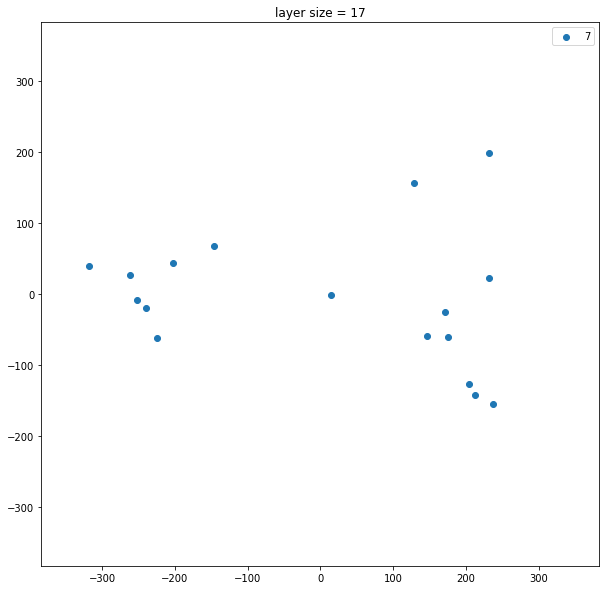

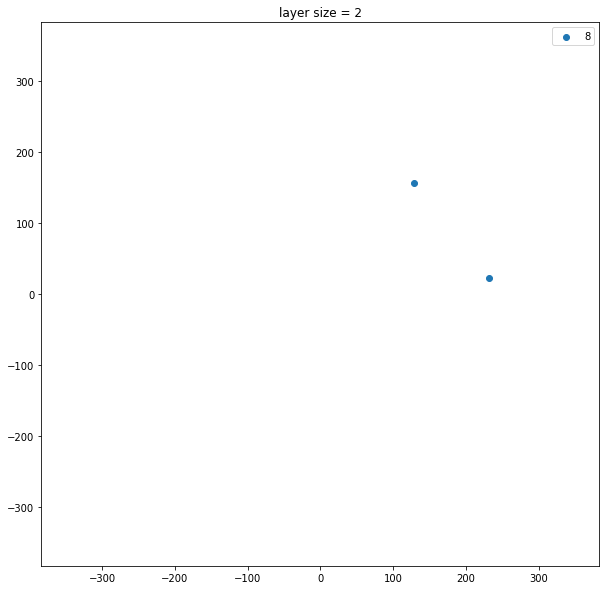

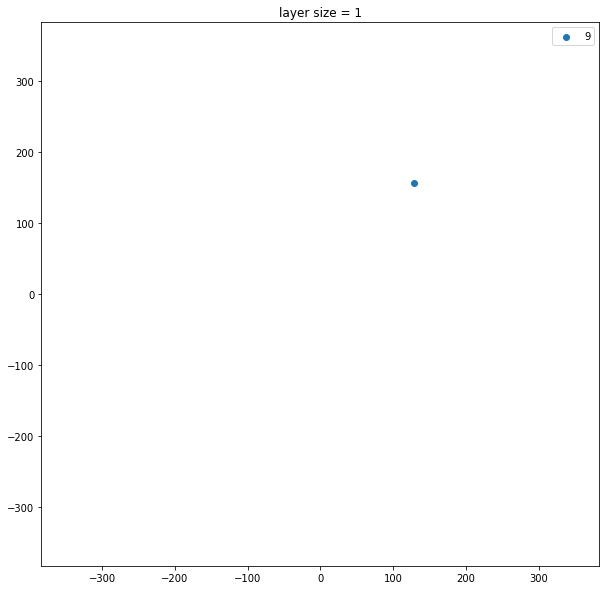

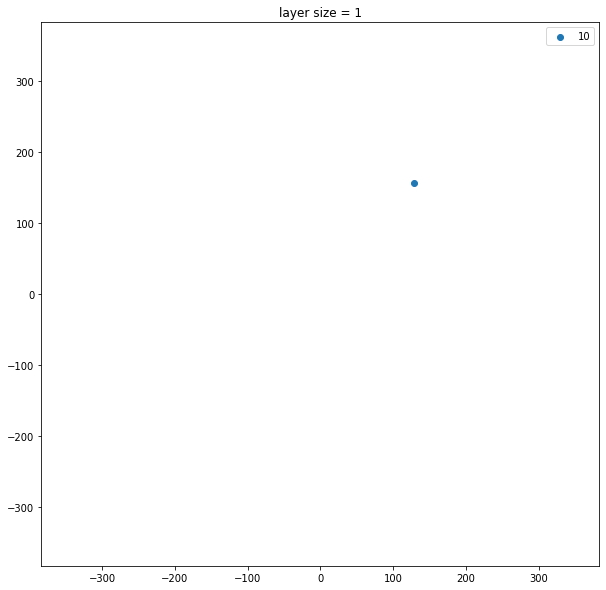

In [45]:
for layer in range(hnsw.graph.height):
    plot_levels(hnsw.graph, layer)

In [13]:
from sklearn.cluster import KMeans

scores = [np.inf, np.inf]
for k in range(2, 31):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(db_embeddings)
    centroids = model.cluster_centers_
    top_layer = []
    for node in hnsw.graph.nodes:
        if node.get_height() == hnsw.graph.height:
            top_layer.append(node.embedding)
    score = sum(min([hnsw.get_distance(c, t) for c in centroids]) for t in top_layer)/len(top_layer)
    print(f"KMeans k={k}: {score}")
    scores.append(score)

KMeans k=2: 174.77720642089844
KMeans k=3: 107.2121810913086
KMeans k=4: 106.96424102783203
KMeans k=5: 67.37535858154297
KMeans k=6: 67.57274627685547
KMeans k=7: 67.2054214477539
KMeans k=8: 68.9176025390625
KMeans k=9: 69.34635925292969
KMeans k=10: 60.90700912475586
KMeans k=11: 62.126014709472656
KMeans k=12: 42.54330825805664
KMeans k=13: 24.575725555419922
KMeans k=14: 23.183517456054688
KMeans k=15: 24.41362190246582
KMeans k=16: 36.939537048339844
KMeans k=17: 33.762210845947266
KMeans k=18: 32.08927536010742
KMeans k=19: 17.590242385864258
KMeans k=20: 18.314802169799805
KMeans k=21: 17.306800842285156
KMeans k=22: 18.38881492614746
KMeans k=23: 16.651397705078125
KMeans k=24: 6.195309638977051
KMeans k=25: 20.136375427246094
KMeans k=26: 17.49848747253418
KMeans k=27: 31.921194076538086
KMeans k=28: 37.3746223449707
KMeans k=29: 16.34135627746582
KMeans k=30: 35.851226806640625


In [14]:
import numpy as np

k = np.argmin(scores)
#k = 11
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(db_embeddings)

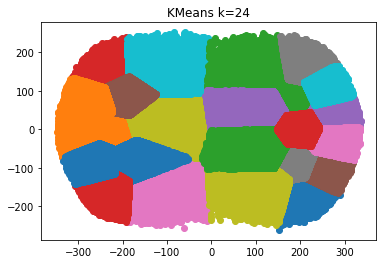

In [25]:
plot_name =f"KMeans k={k}"
for i in np.unique(labels):
    plt.scatter(np.array(db_embeddings)[labels == i , 0] , np.array(db_embeddings)[labels == i , 1] , label = i)
plt.title(plot_name)
plt.show()